In [93]:
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.models import Model
from keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from scipy.optimize import minimize
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_curve
from sklearn import linear_model
from sklearn.metrics import confusion_matrix 
import seaborn as sns



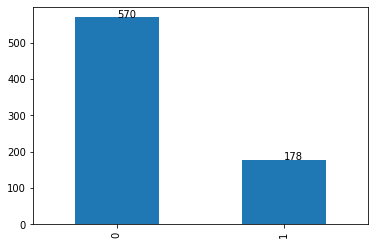

In [104]:
df=pd.read_csv("https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/blood_donation.csv")
#print(df.columns)
#print(df.info())
X=df[['recency','frequency','time']]
y=df['donation']

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

df['donation'].value_counts().plot(kind='bar')

no=df[df.donation==0]
yes=df[df.donation==1]
plt.annotate(str(len(no)), xy=(0,len(no)))
plt.annotate(str(len(yes)), xy=(1,len(yes)))

plt.show()

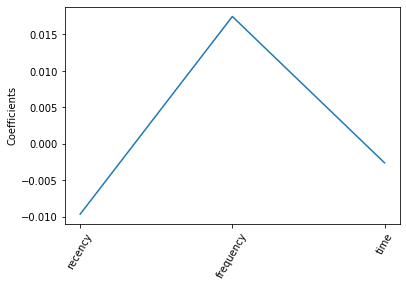

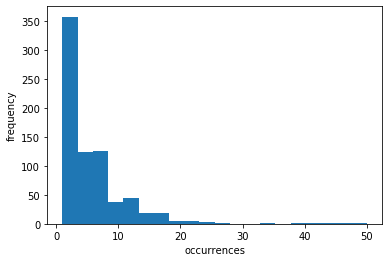

In [105]:
names=['recency','frequency','time']
lasso=Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_

_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)),names,rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

plt.hist(df['frequency'],bins=20)
plt.ylabel('frequency')
plt.xlabel('occurrences')
plt.show()

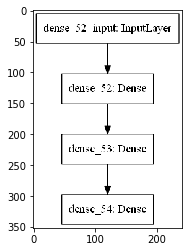

In [106]:
#A scaling layer.
#Two perceptron layers.
#A probabilistic layer.

#We set 2 perceptron layers, one hidden layer with 3 neurons as a first guess 
#and one output layer with 1 neuron, both layers having the logistic activation function

model=Sequential()

model.add(Dense(3, input_dim=3, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

early_stopping_monitor=EarlyStopping(patience=3)
#model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer=Adam(learning_rate=0.05), loss="mse", metrics=['accuracy'])

plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()

In [ ]:
scalar = MinMaxScaler()
scalar.fit(X)
X_scaled = scalar.transform(X)

model.fit(X_scaled, y,callbacks=[early_stopping_monitor],  epochs=500, verbose=False)

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


In [ ]:
y_pred=model.predict(X_scaled)
buffer=y_pred.flatten()
#print(buffer)
yes=buffer[buffer>=.5]
no=buffer[buffer<.5]
print(len(yes))
print(len(no))

counts=[len(no),len(yes)]
plt.bar(range(2),counts)
plt.ylabel("Counts")
plt.xlabel("Rejection/Success")

plt.annotate(str(len(no)), xy=(0,len(no)))
plt.annotate(str(len(yes)), xy=(1,len(yes)))

plt.show


In [ ]:
logreg=linear_model.LogisticRegression()
logreg.fit(X_train,y_train)
ytrain_pred_probas = logreg.predict_proba(X)[:, 1]   # prob of predict as 1
fpr, tpr, thresholds = roc_curve(y, ytrain_pred_probas)   # precision_recall_curve
roc = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thresholds})

_ = plt.figure()
plt.plot(roc.FPR, roc.TPR)
plt.axvline(0.1, color = '#00C851', linestyle = '--')
plt.xlabel("FPR")
plt.ylabel("TPR")

In [ ]:
#recency: 9 months since the last donation.
#frequency: 5 number of donations.
#time: 34 months since the first donation.
#donation: 30% probability.
  
recency=9
frequency=5
time=34
pattern=[[recency,frequency,time]]
print(logreg.predict_proba(pattern))


y_pred = logreg.predict(X_test)
print("Actual donation count ",len(df[df['donation']==1]),len(y))
print("Predicted donation count ",len(y_pred[y_pred==1]),len(y_pred))
buffer=pd.Series(y_pred)
buffer.value_counts().plot(kind='pie')
plt.show()

print("Accuracy is %s",logreg.score(X_test,y_test)*100)